<div>
    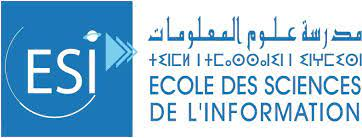
</div>

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;">
<p style="color:orange;font-weight:bold"><u>Réalisé par:</u></p>
<ul >
    <li>ELGHAZI Soufiane</li>
    <li>MAASRI Amine</li>
    <li>Dahmou Youssef</li>
    <li>OUAHIB Yassine</li>
</ul>
    
</div>

<h1 style='color:purple' align='center'>Projet Text mining: News SUM </h1>

<div style="background-color:white; color:black; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid black;font-weight:bold;">
Dans ce Notebook on va explorer les différentes étapes de réalisation de notre Projet qui porte sur la construction d'une Application de résumé des article de presse en utilisant les techniques de NLP et différentes architecture de réseaux de neuronnes : LSTM , PEGASUS , BART  </div>

<div style="background-color:white; color:black; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;">
<p style="color:blue;">Choix des modèles</p>
    
<p style="color:olive;">LSTM (Long Short-Term Memory):</p>
<u>Justification :</u> Les LSTM sont des réseaux de neurones récurrents qui sont conçus pour capturer des dépendances à long terme dans les séquences de données. Étant donné que la création d'un résumé nécessite la compréhension du contexte global du texte, les LSTM peuvent être efficaces pour cette tâche en raison de leur capacité à traiter les dépendances à long terme.<br><br>
    
<p style="color:orangered;">BART(Bidirectional and Auto-Regressive Transformers):</p>
<u>Justification :</u> BART peut être efficace pour la génération de résumés en raison de sa capacité à modéliser à la fois le contexte antérieur et postérieur. Cela permet au modèle de comprendre le flux de l'information dans les articles de presse, ce qui peut conduire à des résumés plus informatifs et cohérents.<br><br>
    
<p style="color:purple;">PEGASUS:</p>
 est un modèle de pré-entraînement pour la génération de résumés abstraits. Il est spécifiquement conçu pour la tâche de résumé automatique, où il apprend à représenter le contenu d'un document et à générer un résumé précis et cohérent.<br>
<u>Justification :</u> PEGASUS est particulièrement adapté à votre projet car il a été spécialement conçu pour la génération de résumés. En utilisant un modèle pré-entraîné comme PEGASUS, vous pouvez bénéficier de la capacité du modèle à comprendre la structure et le contexte des articles de presse pour produire des résumés de haute qualité.<br><br>
</div>

<h2 style='color:olive' align='center'>Introduction </h2>

<div style="text-align:center;height:70;">
    <img src="https://s.france24.com/media/display/5f8c3650-6dcb-11ee-966a-005056a90321/w:1280/p:4x3/000_33Y37TB.jpg" alt="image1">
</div>

<div style="background-color:white; color:black; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;">
De nos jours, l'essor des réseaux sociaux, tels qu'Instagram, a ouvert de nouvelles perspectives de communication et d'information. Cependant, la transparence de ces plateformes est devenue une préoccupation majeure, en particulier lorsqu'il s'agit de sujets sensibles tels que la situation en Palestine. Des observations révèlent que des contenus relatifs à cette région sont souvent censurés, masquant ainsi des aspects cruciaux de la réalité.<br><br>
    
<div style="text-align:center;width:200">
    <img src="https://www.lejde.be/wp-content/uploads/2023/10/PHOTONEWS_11057447-054-scaled.jpg" alt="image2">
</div>
    
C'est dans ce contexte que notre application se distingue, s'érigeant comme un moyen innovant de contrecarrer cette opacité. Plutôt que de se plier à la tendance à la suppression de contenus, notre application a pour mission de donner aux utilisateurs un accès direct à l'information, en particulier à travers des articles de presse approfondis. Conscients du temps limité de nos utilisateurs et de la complexité parfois décourageante des articles journalistiques, notre application intervient en simplifiant ce processus. Nous prenons des articles de news, souvent longs et détaillés, et les résumons de manière à fournir des points essentiels, permettant ainsi à chacun de rester informé de manière concise et efficace.

En substance, notre application vise à combler le fossé entre l'information exhaustive et la facilité d'accès, en offrant un moyen transparent et impartial d'aborder des sujets cruciaux, tout en encourageant une compréhension plus profonde et nuancée du monde qui nous entoure.  </div>

<h2 style='color:olive' align='center'>Plan </h2>

<div style="background-color:white; color:black; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;">
<p style="color:purple;">Étape 1 : Collecte et préparation des données</p>
 Collecter un corpus de textes de différentes sources pour les articles de presse<br><br>
 Préparer les données en les nettoyant et en les normalisant.<br><br>
<p style="color:purple;">Références</p>
 Les liens vers les ressources utilisées et consulté .<br><br>
</div>

<h2 style='color:purple'>Importation des Bibliothèques: </h2>

In [1]:
pip install rouge

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install newspaper3K

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 4.0 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for feedparser>=5.2.1 from https://files.pythonhosted.org/packages/7c/d4/8c31aad9cc18f451c49f7f9cfb5799dadffc88177f7917bc90a66459b1d7/feedparser-6.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for tldextract>=2.0.1 from https://files.pythonhosted.org/packages/d0/de/3f37b2568115c7ebeae39508dc1092f04f3dc286f22ef30171baca9c9cf2/tldextract-5.1.1-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 62.2 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 10.0 MB/s eta 0:00:00
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any

In [ ]:
!pip install eventregistry --upgrade

In [ ]:
from bs4 import BeautifulSoup
import requests
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

from newspaper import Article
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import re
import string
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu
from nltk.tokenize import sent_tokenize

from sklearn.model_selection import train_test_split

from rouge import Rouge
from wordcloud import WordCloud

from eventregistry import *
import json

In [4]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth",200)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<h2 style='color:olive' align='center'>Étape 1 : Collecte et préparation des données </h2>

<h3 style='color:orangered'>Code de Scraping: </h3>

<div style="background-color:cyan; color:black; font-size:14px; font-family:Verdana; padding:10px;border: 4px solid black;text-align:center;font-weight:bold">
I-Scraper CNN news avec la bibliothèque newspaper
</div>

<div style="background-color:orange; color:black; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid black;font-weight:bold;">
On a essayer d'automatiser l'approche de récupération des urls avec le code suivant de Beautifull Soup: </div>

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
La fonction de scraping:
</div>

In [ ]:
def scrape_news(url, max_articles=None):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    articles = []
    for link in soup.find_all('a', href=True):
        if max_articles and len(articles) >= max_articles:
            break
        article_url = link['href']
        if article_url.startswith(('http://', 'https://')):
            try:
                article = Article(article_url)
                article.download()
                article.parse()
                content = article.text
                summary = article.summary
                articles.append({'Content': content, 'Summary': summary})
            except Exception as e:
                print(f"Error processing {article_url}: {e}")
    return articles

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
l'application de la fonction de scraping sur le site de <a href="https://edition.cnn.com/" style="color:yellow;">https://edition.cnn.com/</a> et stocker les résultats scraper dans un fichier news_dataset_2.xlsx
</div>

In [ ]:
def main():
    news_url = 'https://edition.cnn.com/'
    max_articles = 200 
    news_data = scrape_news(news_url, max_articles)
    df = pd.DataFrame(news_data)
    df.to_excel("../Data/Scraped_Data/news_dataset_2.xlsx", index=False)
    print(df.head())
if __name__ == "__main__":
    main()

<div style="background-color:orange; color:black; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid black;font-weight:bold;">
Le problème avec cette approche c'est que lors de scraping les cookies et parfois le code scrap les liens vers les vidéo , ce que gènère des données non utiles, pour cela on a opter par l'approche de création de liste des urls et les parcourir : </div>

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
On définit tous d'abord la liste des URLs a scrapés 
</div>

In [ ]:
urls=["https://edition.cnn.com/2020/03/03/weather/nashville-tornado-tuesday/index.html",
     "https://edition.cnn.com/2023/12/16/us/tennessee-tornado-baby-found-alive/index.html",
      "https://edition.cnn.com/2020/03/03/weather/nashville-tornado-tuesday/index.html",
      "https://edition.cnn.com/2023/12/17/weather/northeast-storms-flooding-travel-monday/index.html",
      "https://edition.cnn.com/travel/gallery/modern-ships-sails-spc-intl/index.html",
      "https://edition.cnn.com/2023/11/29/africa/nigeria-women-health-risks-as-equals-intl-cmda/index.html",
      "https://edition.cnn.com/2023/12/18/africa/egypt-sisi-election-intl/index.html",
      "https://edition.cnn.com/2023/12/14/europe/hamas-leader-turkey-october-7-erdogan-intl/index.html",
      "https://edition.cnn.com/2023/11/30/politics/biden-administration-israel-war-hamas/index.html",
      "https://edition.cnn.com/2023/12/08/politics/post-war-gaza-plans/index.html",
      "https://edition.cnn.com/2023/12/07/opinions/israel-hamas-gaza-media-press-prusher/index.html",
      "https://edition.cnn.com/middleeast/live-news/israel-hamas-war-gaza-news-12-17-23/index.html",
      "https://edition.cnn.com/2023/11/08/americas/demonstrators-killed-mining-protests-panama/index.html",
      "https://edition.cnn.com/2023/12/08/middleeast/israel-un-diplomatic-showdown-hamas-war-mime-intl/index.html",
      "https://edition.cnn.com/2023/01/19/middleeast/iran-man-kills-wife-sentenced-intl/index.html?dicbo=v2-PT5ggt6&iid=ob_lockedrail_longstory_pool",
      "https://edition.cnn.com/2023/12/05/china/mayday-lip-sync-investigation-china-intl-hnk/index.html",
      "https://edition.cnn.com/2023/12/08/asia/taiwan-intelligence-china-leaders-meeting-election-interference-intl-hnk/index.html",
      "https://edition.cnn.com/2023/12/15/economy/china-economy-data-november-hnk-intl/index.html",
      "https://edition.cnn.com/2023/12/18/tech/crypto-super-pac/index.html",
      "https://edition.cnn.com/2023/12/18/business/railroads-southern-border/index.html",
      "https://edition.cnn.com/2023/12/18/tech/apple-halt-sales-apple-watches/index.html",
      "https://edition.cnn.com/2023/12/12/media/elon-musk-x-conspiratorial-rabbit-hole/index.html",
      "https://edition.cnn.com/2023/12/18/business/trevor-milton-nikola-sentenced/index.html"   
     ]

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
On définit la fonction qui va parcourir les liens , les scraper et les rendre dans une dataframe:
</div>

In [ ]:
def url_text(url):
    article = Article(url)
    article.download()
    article.parse()
    Content = article.text
    article.nlp()
    Summary = article.summary
    return Content , Summary
data=[url_text(url) for url in urls]

In [ ]:
columns_names=['Content','Summary']
df_1= pd.DataFrame(data=data,columns=columns_names)

In [ ]:
df_1.Summary[1]

In [ ]:
df_1.Content[1]

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Maintenant on enregistre le jeux de données dans un fichier excel df_1.xlsx
</div>

In [ ]:
df_1.to_excel("../Data/Scraped_Data/df_1.xlsx", index=False)

In [1]:
df_1=pd.read_excel("../Data/Scraped_Data/df_1.xlsx")

<div style="background-color:cyan; color:black; font-size:14px; font-family:Verdana; padding:10px;border: 4px solid black;text-align:center;font-weight:bold">
II- Scraperles news avec une API <a href="https://www.newsapi.ai/" style="color:red;">newsapi.ai
</div>

<div style="background-color:orange; color:black; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid black;font-weight:bold;">
Dans cette approche on va utiliser une API pour scraper les news , cepandant le output sera un fichier JSON qui contient les articles , et pour la colonne de résumé on va opter par <span style="color:white">l'apprentissage semi supérvisé</span> autrement dit on va utiliser un modèle pré-entrainer qui génère les résumé dans notre cas sera le modèle <span style="color:white">T5</span> , pour construire la colonne Summary, Maintenant on va utiliser notre api pour scraper différents site.</div>

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
 on va commencer par les sujet liés à Palestine et Israel:
</div>

In [ ]:
er = EventRegistry(apiKey="be8fb320-15de-4f70-897c-73febb47a3f9")
# spécifier l'URI de la location 
usUri = er.getLocationUri("USA") 

q = QueryArticlesIter(
    keywords=QueryItems.OR(["Palestine","Israel"]),
    minSentiment=0.4,
    sourceLocationUri=usUri,
    dataType=["news", "blog"]
)
# Liste pour stocker les articles
articles_list = []

# avoir en max 500 articles ou blog .
for art in q.execQuery(er, sortBy="date", maxItems=500):
    articles_list.append(art)

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Maintenant on enregistre le jeux de données dans un fichier Json palestine_israel.json
</div>

In [ ]:
output_file_path = "../Data/Scraped_Data/palestine_israel.json"
with open(output_file_path, 'w', encoding='utf-8') as json_file:
    json.dump(articles_list, json_file, ensure_ascii=False, indent=4)

print(f"Articles saved to {output_file_path}")

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Ensuite on va scraper les articles de l'Intelligence Artificiel .
</div>

In [ ]:
er = EventRegistry(apiKey="be8fb320-15de-4f70-897c-73febb47a3f9")
# spécifier l'URI de la location 
usUri = er.getLocationUri("USA") 

q = QueryArticlesIter(
    keywords=QueryItems.OR(["Artificial Intelligence"]),
    minSentiment=0.4,
    sourceLocationUri=usUri,
    dataType=["news", "blog"]
)
# Liste pour stocker les articles
articles_list = []

# avoir en max 500 articles ou blog .
for art in q.execQuery(er, sortBy="date", maxItems=500):
    articles_list.append(art)

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Enregistrer le résultats dans un fichier Json artificial_intelligence.json
</div>

In [ ]:
output_file_path = "../Data/Scraped_Data/artificial_intelligence.json"
with open(output_file_path, 'w', encoding='utf-8') as json_file:
    json.dump(articles_list, json_file, ensure_ascii=False, indent=4)
    
print(f"Articles saved to {output_file_path}")

<div style="background-color:orange; color:black; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid black;font-weight:bold;">
Maintenant on va importer les fichiers JSON dans une dataframe et essayer de les résumer et consruire une dataframe <span style="color:white">df_2 </span>qui contient deux colonnes Content et Summary</div>

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
En commence par définir les paths vers les fichiers json</div>

In [ ]:
json_artificial_intelligence_path = "../Data/Scraped_Data/artificial_intelligence.json"
json_palestine_israel_path = "../Data/Scraped_Data/palestine_israel.json"

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
ensuite en charge les fichiers en un objet Python
</div>

In [ ]:
with open(json_artificial_intelligence_path, 'r', encoding='utf-8') as json_file_1:
    data_IA = json.load(json_file_1)
with open(json_palestine_israel_path, 'r', encoding='utf-8') as json_file_2:
    data_palestine_israel = json.load(json_file_2)

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Extraire la colonne "body" à partir de json data
</div>

In [ ]:
body_IA_column = [article.get('body', '') for article in data_IA]
body_palestine_israel_column = [article.get('body', '') for article in data_palestine_israel]

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Créer les dataframe df_json_1 et df_json_2:
</div>

In [ ]:
df_json_1 = pd.DataFrame({'Content': body_IA_column})
df_json_2 = pd.DataFrame({'Content': body_palestine_israel_column})

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Merger les dataframes dans une dataframe df_2:
</div>

In [ ]:
df_2 = pd.concat([df_json_1, df_json_2], ignore_index=True)
df_2= df_2.drop_duplicates()

In [ ]:
df_2.shape

<div style="background-color:orange; color:black; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid black;font-weight:bold;">
Maintenant on va générer les résumés de la colonne Content avec T5</div>

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
La fonction pour générer le résumer avec T5
</div>

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
def generate_summary(text):
    model_name = "t5-small"
    tokenizer = T5Tokenizer.from_pretrained(model_name)
    model = T5ForConditionalGeneration.from_pretrained(model_name)
    inputs = tokenizer("summarize: " + text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_length=150, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
L'appliquer sur df_2 pour créer la colonne Summary
</div>

In [ ]:
df_2['Summary'] = df_2['Content'].apply(generate_summary)
df_2.to_excel("../Data/Scraped_Data/df2_T5.xlsx", index=False)
print(df.head())

In [2]:
df_2 = pd.read_excel("../Data/Scraped_Data/df2_T5.xlsx")

<div style="background-color:cyan; color:black; font-size:14px; font-family:Verdana; padding:10px;border: 4px solid black;text-align:center;font-weight:bold">
III- Enrechissement des données:
</div>

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Ensuite on va enrichir notre corpus avec un fichier csv extrait à partir de kaggle qui mélange entre les datasets:XSum, CNN/Daily Mail, Multi-News . ce jeu de donnée contient 1000 observation .</div>

In [3]:
df_3 = pd.read_excel("../Data/Enrechissement_Data/df_3.xlsx")

<h3 style='color:orangered'>Construction de Corpus: </h3>

<div style="background-color:orange; color:black; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid black;font-weight:bold;">
Maintenant on va construire notre compus en consolidant les fichiers scrapé et le fichier d'enrichissement: </div>

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Maintenant on va construire notre corpus de données.
</div>

In [4]:
df_1.shape , df_2.shape , df_3.shape

((34, 2), (870, 2), (1000, 2))

In [ ]:
corpus = pd.concat([df_1, df_2, df_3], ignore_index=True)
corpus.to_excel("../Data/Final_Data/corpus.xlsx", index=False)

In [2]:
corpus= pd.read_excel("../Data/Final_Data/corpus.xlsx")
corpus

,Content,Summary
0,CNN —\n\nSevere storms and at least one tornad...,“It’s heartbreaking.”Initial surveys indicated...
1,CNN —\n\nBy the time the tornado siren sounded...,CNN —By the time the tornado siren sounded one...
2,CNN —\n\nSevere storms and at least one tornad...,“It’s heartbreaking.”Initial surveys indicated...
3,CNN —\n\nA powerful storm that’s been slamming...,The storm dumped 2 - 4 inches of rain over muc...
4,1. How relevant is this ad to you?\n\nVideo pl...,How relevant is this ad to you?\nVideo player ...
...,...,...
1899,"By . Kelly Strange . PUBLISHED: . 08:10 EST, 2...","Lucy Copland, 27, from Lincolnshire, was worri..."
1900,By . Harriet Arkell . A wartime bunker used by...,English Heritage bestow Grade II listing on im...
1901,By . Sam Creighton . A Nobel Peace Prize has s...,The Nobel Prize was awarded to Carlos Saavedra...
1902,A cyclist has suffered a freak accident after ...,Bronwyn Calver was cycling when a kangaroo lea...


<h3 style='color:orangered'>Exploration des données: </h3>

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
On va faire une exploration aux données avant de commencer 
</div>

In [3]:
corpus.shape

(1904, 2)

In [4]:
corpus.columns

Index(['Content', 'Summary'], dtype='object')

In [5]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  1904 non-null   object
 1   Summary  1904 non-null   object
dtypes: object(2)
memory usage: 29.9+ KB


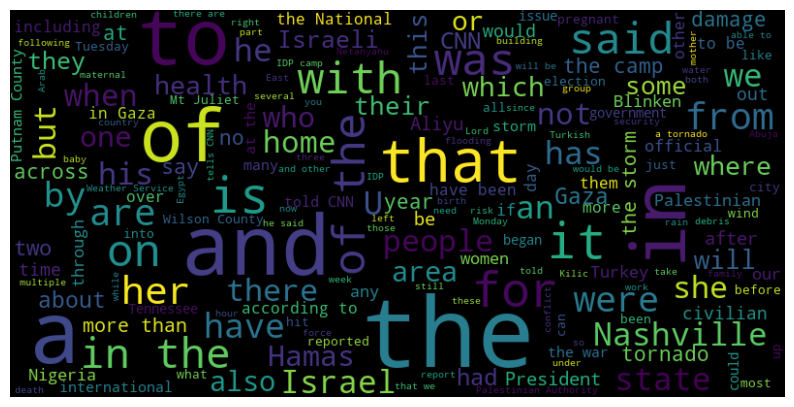

In [13]:
texte_complet = ' '.join(corpus['Content'][:10])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=100,background_color ='black', stopwords ='english',min_font_size = 10).generate(texte_complet)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<h3 style='color:orangered'>Nettoyage des données: </h3>

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Maintenant on va procéder par le nettoyage de notre corpus de données 
</div>

In [3]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                       "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                       "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                       "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                       "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                       "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                       "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                       "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                       "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                       "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                       "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                       "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                       "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                       "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                       "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                       "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                       "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                       "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                       "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                       "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                       "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                       "you're": "you are", "you've": "you have"}

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Ici on va définir une fonction qui permet de nettoyer le corpus 
</div>

In [7]:
def preprocess_text(text):    
    text = str(text)
    # Vérifier si le préfixe "CNN —\n\n" est présent au début de la chaîne
    if (text.startswith("CNN —\n\n")) or (text.startswith("CNN —")) :
        text = re.sub("(CNN —\n\n|CNN —)", '', text)
    text = text.lower()
    # Supprimer les tabulations, les retours à la ligne et les retour chariot.
    text = re.sub("(\\t)", ' ', str(text)) 
    text = re.sub("(\\r)", ' ', str(text)) 
    text = re.sub("(\\n)", ' ', str(text)) 
    # Supprimer les guillemets doubles du texte.
    text = re.sub('"', '', text)
    # Remplacer les contractions par leur forme étendue
    text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in text.split(" ")])  
    # Supprimer les possessifs "'s" des mots.
    text = re.sub(r"'s\b","",text)
    # Supprimer _ s'il se produit plus d'une fois consécutivement
    text = re.sub("(__+)", ' ', str(text))        
    # Supprimer - s'il se produit plus d'une fois consécutivement
    text = re.sub("(--+)", ' ', str(text))    
    # Supprimer ~ s'il se produit plus d'une fois consécutivement
    text = re.sub("(~~+)", ' ', str(text))     
    # Supprimer + s'il se produit plus d'une fois consécutivement
    text = re.sub("(\+\++)", ' ', str(text))       
    # Supprimer . s'il se produit plus d'une fois consécutivement
    text = re.sub("(\.\.+)", ' ', str(text))       
    # Supprimer les caractères - <>()|&©ø"',;?~*!
    text = re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(text))       
    # Supprimer mailto:
    text = re.sub("(mailto:)", ' ', str(text))   
    # Supprimer \x9* dans le texte
    text = re.sub(r"(\\x9\d)", ' ', str(text))     
    # Remplacer les numéros INC par INC_NUM
    text = re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(text))     
    # Remplacer CM# et CHG# par CM_NUM
    text = re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(text))      
    # Supprimer la ponctuation à la fin d'un mot
    text = re.sub("(\.\s+)", ' ', str(text)) 
    text = re.sub("(\-\s+)", ' ', str(text)) 
    text = re.sub("(\:\s+)", ' ', str(text))             
    # Remplacer toute URL par le nom de domaine uniquement
    try:
        url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(text))
        repl_url = url.group(3)
        text = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', repl_url, str(text))
    except:
        pass 
    # Supprimer les espaces multiples
    text = re.sub("(\s+)", ' ', str(text))     
    # Supprimer le caractère unique entre deux espaces
    text = re.sub("(\s+.\s+)", ' ', str(text))
    # Supprimer les emojis
    text = re.sub("[^\w\s\d!@#$%^&*(),.?\":{}|<>~\\[\];/\\-]", ' ', text)
    return text

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Appliquer le prétraitement à la colonne 'Content'et 'Summary' et ajouter une nouvelle colonne 'Content_preprocessed'et 'Summary_preprocessed'
</div>

In [8]:
corpus['Summary_preprocessed'] = corpus['Summary'].apply(preprocess_text)
corpus['Content_preprocessed'] = corpus['Content'].apply(preprocess_text)

<h3 style='color:orangered'>Traitement de corpus: </h3>

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Supprimer les deux colonnes Content et Summary 
</div>

In [9]:
corpus = corpus.drop(["Content", "Summary"], axis=1)

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Supprimer les lignes vides
</div>

In [10]:
corpus.replace('', np.nan, inplace=True)
corpus.dropna(axis=0,inplace=True)

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Afficher un extrait de corpus apres le nettoyage
</div>

In [11]:
corpus

,Summary_preprocessed,Content_preprocessed
0,it s heartbreaking. initial surveys indicated...,severe storms and at least one tornado slammed...
1,by the time the tornado siren sounded one week...,by the time the tornado siren sounded one week...
2,it s heartbreaking. initial surveys indicated...,severe storms and at least one tornado slammed...
3,the storm dumped 4 inches of rain over much of...,a powerful storm that s been slamming the nort...
4,how relevant is this ad to you video player wa...,1 how relevant is this ad to you video player ...
...,...,...
1899,lucy copland 27 from lincolnshire was worried ...,by kelly strange published 08:10 est 29 may 20...
1900,english heritage bestow grade ii listing on im...,by harriet arkell wartime bunker used by winst...
1901,the nobel prize was awarded to carlos saavedra...,by sam creighton nobel peace prize has sold fo...
1902,bronwyn calver was cycling when kangaroo leape...,a cyclist has suffered freak accident after be...


In [12]:
corpus["Summary_preprocessed"][22]

'click allow to get notifications on every article we post.'

In [13]:
corpus = corpus[~corpus['Content_preprocessed'].str.contains("click allow to get notifications on every article we post.")].reset_index(drop=True)

In [14]:
corpus["Summary_preprocessed"][22]

'new york cnn  nikola founder trevor milton was sentenced monday to four years in prison for lying to investors about the company s hydrogen and electric truck technology milton was facing up to 60 years behind bars if he was sentenced to the maximum penalty  trevor milton lied to investors again and again on social media on television on podcasts and in print us attorney damian williams said in statement in october 2022 new york jury convicted milton on federal charges of securities fraud and wire fraud according to prosecutors milton claimed the vehicle  fully functions and works which is really incredible  even though it was missing important parts and systems including motors and control system.'

In [15]:
corpus.shape

(1893, 2)

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Visualiser la distribution de texte et de résumé:
</div>

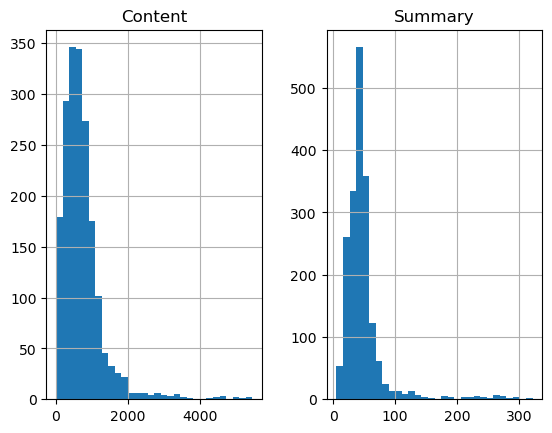

In [17]:
Content_Count = []
Summary_Count = []

for i in corpus['Content_preprocessed']:
      Content_Count.append(len(i.split()))
for i in corpus['Summary_preprocessed']:
      Summary_Count.append(len(i.split()))

length_df = pd.DataFrame({'Content':Content_Count, 'Summary':Summary_Count})
length_df.hist(bins = 30)
plt.show()

<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Vérifier le pourcentage de texte qui a entre 0 et 500 mots et de résumé qui est entre 0 et 100 mots
</div>

In [18]:
cnt = 0
for i in corpus['Summary_preprocessed']:
    if len(i.split()) <= 120:
        cnt = cnt + 1
print(cnt / len(corpus['Summary_preprocessed']))

0.95932382461701


In [20]:
cnt = 0
for i in corpus['Content_preprocessed']:
    if len(i.split()) <= 2000:
        cnt = cnt + 1
print(cnt / len(corpus['Content_preprocessed']))

0.971473851030111


<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
Et comme cela on arrive à la fin de la premièere étape , maintenant on va sauvgarder notre jeu de données dans un fichier cleaned_corpus.xls pour l'exploiter par la suite dans la création des modèles: 
</div>

In [16]:
corpus.to_excel("Data/Final_Data/cleaned_corpus.xlsx", index=False)

<h2 style='color:olive' align='center'>Références: </h2>

---
<div style="background-color:olive; color:white; font-size:15px; font-family:Verdana; padding:10px;font-weight:bold;border: 5px solid black;text-align:center">
<ul>
<li><a href="https://blog.research.google/2016/08/text-summarization-with-tensorflow.html" style="color:white;"> Ressource 1</a></li>
<li><a href="https://en.wikipedia.org/wiki/Tf%E2%80%93idf" style="color:white;"> Ressource 2</a></li>
<li><a href="https://www.kaggle.com/datasets/sbhatti/news-summarization/data" style="color:white;"> Ressource 3 </a></li>
<li><a href="https://radimrehurek.com/gensim/models/word2vec.html" style="color:white;"> Ressource4 </a></li>
    
</ul>
</div>

---

<h2 style='color:olive' align='center'>END </h2>